<a href="https://colab.research.google.com/github/atvrai/Djikstra-Algorithm-Simulation/blob/main/ATHARVA_RAI_22JE0199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRESS RUN ALL AND SCROLL DOWN FOR THE SIMULATION**

In [2]:
# ------------------------------------------------------------
# Dijkstra’s Algorithm Simulation (13 nodes, 24 edges)
# ------------------------------------------------------------
# Works on Google Colab – just copy-paste and run this cell.
# ------------------------------------------------------------

import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
from IPython.display import clear_output

# ------------------------------------------------------------
# Step 1: Define the graph
# ------------------------------------------------------------


In [3]:
edges = [
    (0, 1, 3), (0, 3, 8),
    (1, 2, 5), (1, 3, 4),
    (2, 3, 4), (2, 4, 2),
    (3, 4, 6), (3, 5, 9),
    (4, 5, 2), (4, 6, 7),
    (5, 6, 3), (5, 9, 7), (5, 11, 6),
    (6, 7, 5), (6, 11, 4),
    (7, 8, 6), (7, 9, 11),
    (8, 9, 8), (8, 10, 10),
    (9, 11, 12), (9, 10, 11),
    (10, 11, 8), (10, 12, 7),
    (11, 12, 3)
]

# Build undirected weighted graph
G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=7)   # fixed layout

# ------------------------------------------------------------
# Step 2: Dijkstra algorithm with live visualization
# ------------------------------------------------------------
def dijkstra_visual(G, src):
    INF = float('inf')
    dist = {node: INF for node in G.nodes}
    dist[src] = 0
    pq = [(0, src)]
    visited = set()

    step = 0
    while pq:
        d, u = heapq.heappop(pq)
        if u in visited:
            continue
        visited.add(u)
        step += 1

        # --- Visualization part ---
        clear_output(wait=True)
        plt.figure(figsize=(10,7))
        node_colors = []
        for node in G.nodes:
            if node == src:
                node_colors.append("#00cc44")       # source (green)
            elif node in visited:
                node_colors.append("#ffaa00")       # visited (orange)
            else:
                node_colors.append("#66b3ff")       # unvisited (blue)

        nx.draw(G, pos, with_labels=True, node_color=node_colors,
                node_size=900, font_size=10, edge_color="gray")

        # Show current edge weights
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

        # Display current shortest distances
        label_str = "\n".join([f"Node {n}: {dist[n] if dist[n] != INF else '∞'}" for n in sorted(G.nodes)])
        plt.title(f"Step {step}: Visiting Node {u}\nCurrent Shortest Distances\n{label_str}",
                  fontsize=10, loc='left')
        plt.show()
        time.sleep(1.2)  # delay to visualize step-by-step

        # --- Relax edges ---
        for v in G.neighbors(u):
            w = G[u][v]['weight']
            if dist[v] > d + w:
                dist[v] = d + w
                heapq.heappush(pq, (dist[v], v))

    return dist




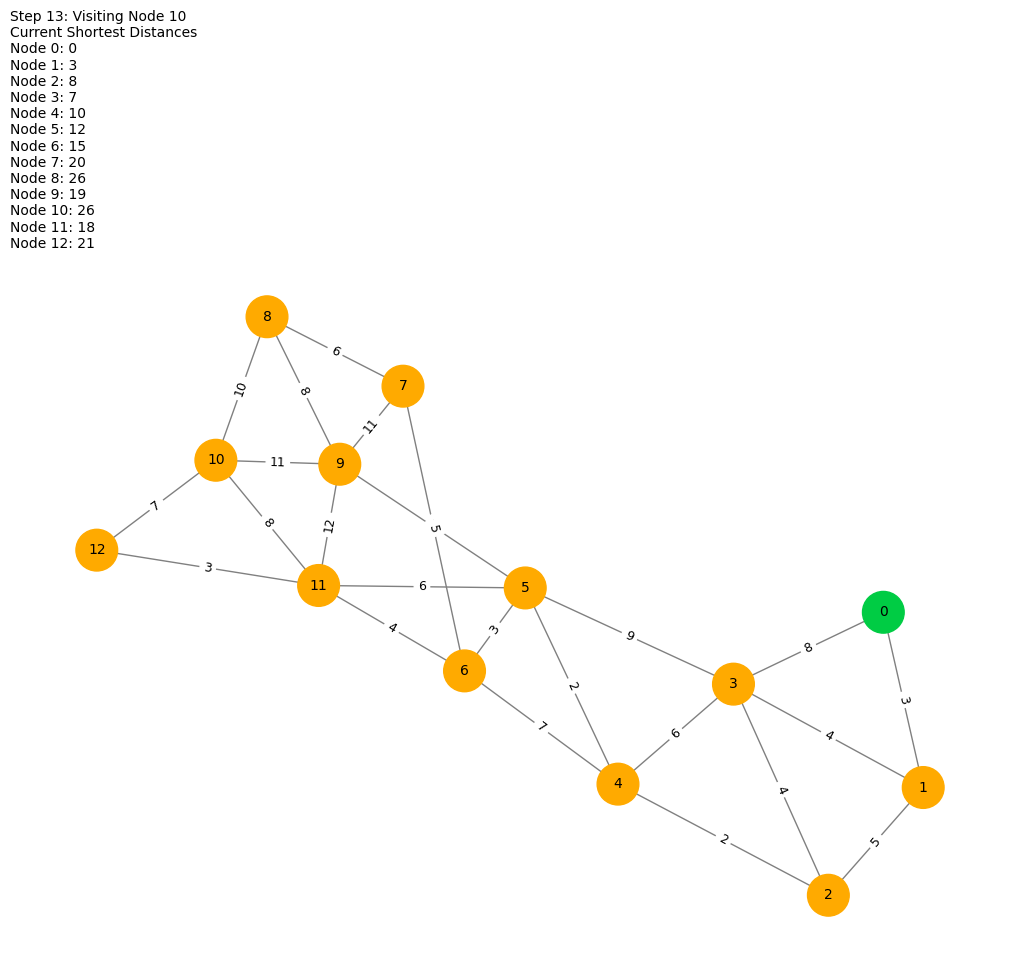

Final shortest distances from source node 0
Node 0: 0
Node 1: 3
Node 2: 8
Node 3: 7
Node 4: 10
Node 5: 12
Node 6: 15
Node 7: 20
Node 8: 26
Node 9: 19
Node 10: 26
Node 11: 18
Node 12: 21


In [4]:
# ------------------------------------------------------------
# Step 3: Run simulation
# ------------------------------------------------------------
source = 0
final_dist = dijkstra_visual(G, source)

# ------------------------------------------------------------
# Step 4: Print final results
# ------------------------------------------------------------
print("Final shortest distances from source node", source)
for node, d in sorted(final_dist.items()):
    print(f"Node {node}: {d}")
